# TEST worksheet, to be prettyfied/explained.  

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

%load_ext autoreload
%autoreload 2
%aimport scqubits

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scqubits as scq

In [3]:
from pathos.multiprocessing import ProcessingPool    
pool = ProcessingPool(nodes=8)

## Let's define a few qubits

In [4]:
tune_tmon = scq.TunableTransmon(
    EJmax=20.0,
    EC=0.5,
    d=0.00,
    flux=0.0,
    ng=0.3,
    ncut=150
)
transmon = scq.Transmon(
    EJ=0.5,
    EC=12.0,
    ng=0.3,
    ncut=150
)

fluxonium = scq.Fluxonium(
    EJ=8.9,
    EC=2.5,
    EL=0.5,
    cutoff = 150,
    flux = 0.5
)

# parameters for the flux qubit
RATIO = 60.0
ALPHA = 0.8
flux_qubit = scq.FluxQubit(
    EJ1 = 1.0, 
    EJ2 = 1.0, 
    EJ3 = ALPHA*1.0, 
    ECJ1 = 1.0/RATIO, 
    ECJ2 = 1.0/RATIO, 
    ECJ3 = 1.0/ALPHA/RATIO, 
    ECg1 = 50.0/RATIO, 
    ECg2 = 50.0/RATIO, 
    ng1 = 0.0, 
    ng2 = 0.0, 
    flux = 0.4, 
    ncut = 10,
)

## tphi  due to 1/f flux noise

In [5]:
qubit=tune_tmon

# qubit=fluxonium

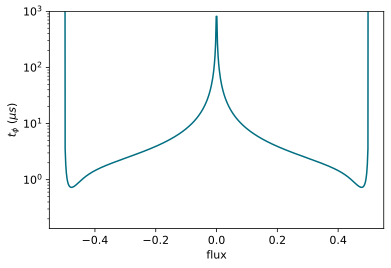

In [6]:
param_array=np.linspace(-0.5, 0.5, 500)
# tphi_array=[qubit.set_and_return('flux', param).tphi_1_over_f_flux() * 1e-3 for param in param_array]

def calc(param , qubit=qubit): return qubit.set_and_return('flux', param).tphi_1_over_f_flux() * 1e-3
results_array=list(pool.map(calc, param_array))

fig, ax=plt.subplots(1,1)
ax.plot(param_array, results_array)
ax.set_yscale('log')
ax.set_ylabel(r'$t_\phi$ ($\mu s$)')
ax.set_xlabel(r'flux')
ax.set_ylim(None, 1e3);

## tphi  due to 1/f flux noise

In [7]:
qubit=transmon

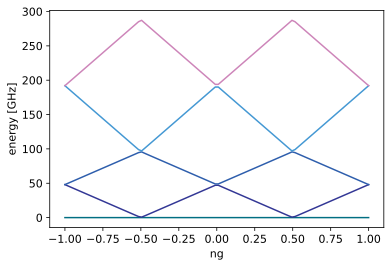

In [8]:
param_list = np.linspace(-1, 1, 100)
qubit.plot_evals_vs_paramvals('ng', param_list, evals_count=5, subtract_ground=True);

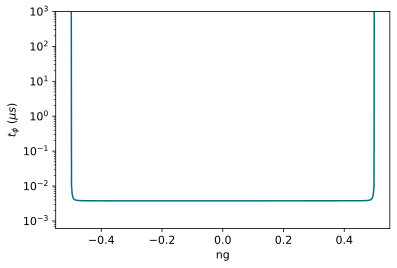

In [9]:
param_array=np.linspace(-0.5, 0.5, 500)
tphi_array=[qubit.set_and_return('ng', param).tphi_1_over_f_ng() * 1e-3 for param in param_array]

fig, ax=plt.subplots(1,1)
ax.plot(param_array, tphi_array)
ax.set_yscale('log')
ax.set_ylabel(r'$t_\phi$ ($\mu s$)')
ax.set_xlabel(r'ng')
ax.set_ylim(None, 1e3);

## tphi  due to 1/f critical current noise

In [10]:
qubit=flux_qubit

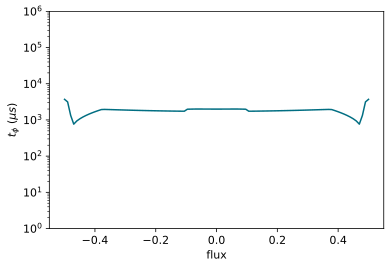

In [11]:
param_array=np.linspace(-0.5, 0.5, 100)
# tphi_array=[qubit.set_and_return('flux', param).tphi_1_over_f_cc3() * 1e-3 for param in param_array]

# def calc(param , qubit=qubit): return qubit.set_and_return('flux', param).tphi_1_over_f_cc3() * 1e-3
def calc(param , qubit=qubit): return qubit.set_and_return('flux', param).tphi_1_over_f_cc() * 1e-3
results_array=list(pool.map(calc, param_array))


fig, ax=plt.subplots(1,1)
ax.plot(param_array, results_array)
ax.set_yscale('log')
ax.set_ylabel(r'$t_\phi$ ($\mu s$)')
ax.set_xlabel(r'flux')
ax.set_ylim(1, 1e6);

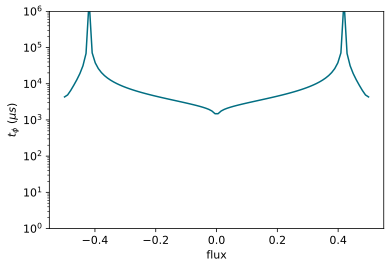

In [12]:
qubit=fluxonium

param_array=np.linspace(-0.5, 0.5, 100)
# tphi_array=[qubit.set_and_return('flux', param).tphi_1_over_f_cc3() * 1e-3 for param in param_array]

# def calc(param , qubit=qubit): return qubit.set_and_return('flux', param).tphi_1_over_f_cc3() * 1e-3
def calc(param , qubit=qubit): return qubit.set_and_return('flux', param).tphi_1_over_f_cc() * 1e-3
results_array=list(pool.map(calc, param_array))


fig, ax=plt.subplots(1,1)
ax.plot(param_array, results_array)
ax.set_yscale('log')
ax.set_ylabel(r'$t_\phi$ ($\mu s$)')
ax.set_xlabel(r'flux')
ax.set_ylim(1, 1e6);

## t1 due to dielectric loss

In [13]:
qubit=fluxonium

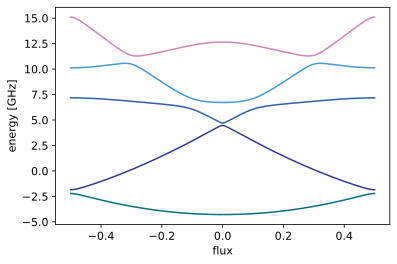

In [14]:
flux_list = np.linspace(-0.5, 0.5, 151)
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=5);

In [15]:
param_array=np.linspace(-0.5, 0.5, 200)
# t1_array=[qubit.set_and_return('flux', param).t1_dielectric_loss(1,0) * 1e-3 for param in param_array]

# def calc(param , qubit=qubit): return qubit.set_and_return('flux', param).tphi_1_over_f_cc3() * 1e-3
def calc(param , qubit=qubit): return qubit.set_and_return('flux', param).t1_dielectric_loss(i=1,j=0) * 1e-3
results_array=list(pool.map(calc, param_array))

Text(0.5, 0, 'flux')

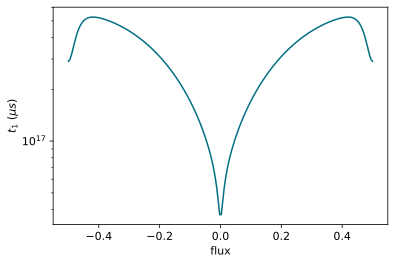

In [16]:
fig, ax=plt.subplots(1,1)
ax.plot(param_array, results_array)
ax.set_yscale('log')
ax.set_ylabel(r'$t_1$ ($\mu s$)')
ax.set_xlabel(r'flux')
# ax.set_ylim(1, 1e6)

## t1 due to capacitive coupling to a transmission line 

In [17]:
qubit=fluxonium

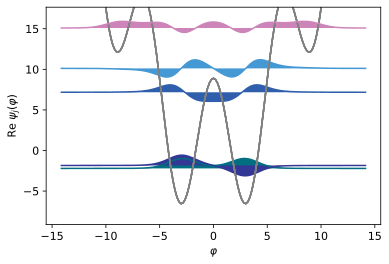

In [18]:
fluxonium.plot_wavefunction(esys=None, which=[0, 1, 2, 3, 4], mode='real');

Text(0.5, 0, 'flux')

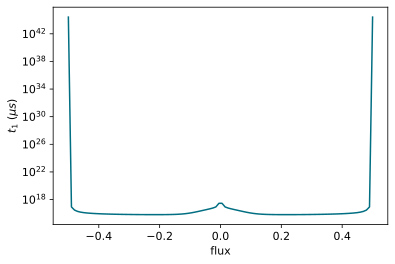

In [19]:
qubit=fluxonium

param_array=np.linspace(-0.5, 0.5, 100)

def calc(param , qubit=qubit): return qubit.set_and_return('flux', param).t1_dielectric_loss(i=2,j=0) * 1e-3
results_array=list(pool.map(calc, param_array))

fig, ax=plt.subplots(1,1)
ax.plot(param_array, results_array)
ax.set_yscale('log')
ax.set_ylabel(r'$t_1$ ($\mu s$)')
ax.set_xlabel(r'flux')
# ax.set_ylim(1, 1e6);

## t1 due to flux bias line 

Text(0.5, 0, 'flux')

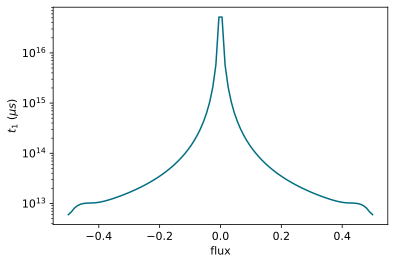

In [20]:
qubit=tune_tmon
param_array=np.linspace(-0.5, 0.5, 100)

def calc(param , qubit=qubit): return qubit.set_and_return('flux', param).t1_flux_bias_line(i=2,j=0) * 1e-3
results_array=list(pool.map(calc, param_array))

fig, ax=plt.subplots(1,1)
ax.plot(param_array, results_array)
ax.set_yscale('log')
ax.set_ylabel(r'$t_1$ ($\mu s$)')
ax.set_xlabel(r'flux')
# ax.set_ylim(1, 1e6);